# Using Norman DataFrame distract from timeseries files

Analysis of the COVID-19 Data Set published by John Hopkins University Center for Systems Science and Engineering (JHU CSSE)
The data is collected and distribued daily.
Anyone can retrieve the full data set from this [GitHub](https://github.com/CSSEGISandData/COVID-19) site.
The primary data files types are:
* Summary Files (Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered, Latitude, Longitude)
* Time Series Files (Province/State, Country/Region, Lat, Long, <dates>) for Confirmed, Deaths, and Recovered counts

In [3]:
# Initialization
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib as p
import time as t
import scipy.stats as st

#--Set this path to the directory where you have cloned the JHU CSSE Data Set
dir_covid_19 = p.PureWindowsPath(r"C:\Users\JeabD\OneDrive\GitHub\Project-1-Group-1-COVID-19\Resources\COVID-19")

#--Set this date to the desired Summary Date
study_date = dt.date(2020, 3, 19)

Summary Data
- Load the Summary File for the Study Date

In [4]:
#--Daily Summary Statistics
#--Format date and store in variable
mmddyyyy_study_date = study_date.strftime("%m-%d-%Y")

#--Parse date to file name
daily_report_filename = p.Path(dir_covid_19) / f"csse_covid_19_data/csse_covid_19_daily_reports/{mmddyyyy_study_date}.csv"
type(daily_report_filename)
ss = pd.read_csv(daily_report_filename)

In [5]:
ss[ss['Country/Region'] == 'Italy']

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
1,NaN,Italy,2020-03-19T17:43:03,41035,3405,4440,41.8719,12.5674


Aggregate the Counts by Country

In [6]:
#--Aggregate the summary data by country
ss_country = pd.pivot_table(ss, values=["Confirmed","Deaths","Recovered"], index="Country/Region", columns=None, aggfunc="sum")
ss_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,22,0,1
Albania,64,2,0
Algeria,87,9,32
Andorra,53,0,1
Antigua and Barbuda,1,0,0
...,...,...,...
Uruguay,79,0,0
Uzbekistan,23,0,0
Venezuela,42,0,0


Time Series Data
- Load a time series of Confirmed case counts
- (The same logic could be used for Death or Recovered counts.)

In [7]:
#--Time Series -- Confirmed
time_series_confirmed_filename = p.Path(dir_covid_19) / "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

tsc = pd.read_csv(time_series_confirmed_filename)
tsc_country = pd.pivot_table(tsc, index="Country/Region", aggfunc="sum").drop(columns=["Lat","Long"])

#--Transpose the DataFrame, because Pandas likes the dates in the index
tsc_country = tsc_country.T
tsc_country

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
1/26/20,0,0,0,0,0,0,0,4,0,0,...,0,5,0,0,0,0,0,0,2,0
1/27/20,0,0,0,0,0,0,0,5,0,0,...,0,5,0,0,0,0,0,0,2,0
1/28/20,0,0,0,0,0,0,0,5,0,0,...,0,5,0,0,0,0,0,0,2,0
1/29/20,0,0,0,0,0,0,0,6,0,0,...,0,5,0,4,0,0,0,0,2,0
1/30/20,0,0,0,0,0,0,0,9,0,0,...,0,5,0,4,0,0,0,0,2,0
1/31/20,0,0,0,0,0,0,0,9,0,0,...,0,7,0,4,2,0,0,0,2,0


In [8]:
# Pandas is loading the column headings (now index values), which look like "mm/dd/yy" dates, as strings.
# The string representation of these dates don't sort chronologically.
# Change the string index to Timestamp index, which Pandas will treat as a DateTimeIndex (an index with extra features).
tsc_country.index = [pd.Timestamp(d) for d in tsc_country.index]
# tsc_country

# Now sort the DataFrame by the Timestamp index
tsc_country = tsc_country.loc[tsc_country.index.sort_values(),:]
tsc_country

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
2020-01-26,0,0,0,0,0,0,0,4,0,0,...,0,5,0,0,0,0,0,0,2,0
2020-01-27,0,0,0,0,0,0,0,5,0,0,...,0,5,0,0,0,0,0,0,2,0
2020-01-28,0,0,0,0,0,0,0,5,0,0,...,0,5,0,0,0,0,0,0,2,0
2020-01-29,0,0,0,0,0,0,0,6,0,0,...,0,5,0,4,0,0,0,0,2,0
2020-01-30,0,0,0,0,0,0,0,9,0,0,...,0,5,0,4,0,0,0,0,2,0
2020-01-31,0,0,0,0,0,0,0,9,0,0,...,0,7,0,4,2,0,0,0,2,0


### Align the trends
* Create a DataFrame with Relative Date Counts.
* Remove the leading zero counts, to align the trends to start with the first non-zero value.

In [9]:
#--Create an DataFrame full of NaN, to hold relative-day trends of infection for each country
npNaN = np.empty(tsc_country.shape)
npNaN[:] = np.NaN
npNaN.shape
rel_country = pd.DataFrame(npNaN, columns=tsc_country.columns.values)

In [10]:
#--Shift the trends up, to start on relative day zero
for (the_column, the_data) in tsc_country.iteritems():
    # print(type(the_column), type(the_data),the_data) 
    trend = np.trim_zeros(the_data.to_numpy(),'f')
    rel_country[the_column][0:len(trend)] = trend
    # break
rel_country

C:\Users\JeabD\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,3.0,...,1.0,1,1.0,4.0,2.0,4.0,1.0,2.0,2.0,2.0
1,1.0,10.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,3.0,...,1.0,1,1.0,4.0,2.0,4.0,6.0,10.0,2.0,2.0
2,1.0,12.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,...,5.0,2,1.0,4.0,2.0,8.0,10.0,17.0,2.0,NaN
3,1.0,23.0,1.0,1.0,1.0,2.0,1.0,6.0,3.0,3.0,...,5.0,2,1.0,4.0,2.0,29.0,15.0,33.0,2.0,NaN
4,1.0,33.0,1.0,1.0,1.0,8.0,1.0,9.0,9.0,6.0,...,6.0,5,1.0,5.0,2.0,50.0,23.0,36.0,2.0,NaN
5,1.0,38.0,1.0,1.0,1.0,12.0,1.0,9.0,14.0,6.0,...,18.0,5,1.0,5.0,2.0,79.0,NaN,42.0,2.0,NaN
6,1.0,42.0,3.0,1.0,1.0,12.0,1.0,12.0,18.0,9.0,...,47.0,5,1.0,5.0,2.0,NaN,NaN,NaN,2.0,NaN
7,1.0,51.0,5.0,1.0,NaN,17.0,1.0,12.0,21.0,9.0,...,98.0,5,1.0,5.0,3.0,NaN,NaN,NaN,2.0,NaN
8,1.0,55.0,12.0,1.0,NaN,19.0,1.0,12.0,29.0,9.0,...,192.0,5,1.0,5.0,3.0,NaN,NaN,NaN,2.0,NaN
9,1.0,59.0,12.0,1.0,NaN,19.0,1.0,13.0,41.0,11.0,...,NaN,7,1.0,5.0,3.0,NaN,NaN,NaN,6.0,NaN


Confirmed Cases increased daily
- Using .diff()

In [11]:
#--Find the number of incraseing case daily (axis = 0 :where 0 represent row, 1 represent column)
diff_confirm_df = rel_country.diff(axis = 0)
diff_confirm_df

,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,1.0,0.0,0.0,0.0,4.0,4.0,7.0,0.0,NaN
3,0.0,11.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.0,5.0,16.0,0.0,NaN
4,0.0,10.0,0.0,0.0,0.0,6.0,0.0,3.0,6.0,3.0,...,1.0,3.0,0.0,1.0,0.0,21.0,8.0,3.0,0.0,NaN
5,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,12.0,0.0,0.0,0.0,0.0,29.0,NaN,6.0,0.0,NaN
6,0.0,4.0,2.0,0.0,0.0,0.0,0.0,3.0,4.0,3.0,...,29.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
7,0.0,9.0,2.0,0.0,NaN,5.0,0.0,0.0,3.0,0.0,...,51.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,NaN
8,0.0,4.0,7.0,0.0,NaN,2.0,0.0,0.0,8.0,0.0,...,94.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
9,0.0,4.0,0.0,0.0,NaN,0.0,0.0,1.0,12.0,2.0,...,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0,NaN


Find Average of confirmed cases daily
- Using .mean()

In [12]:
# Find average of the number of the increaseing case daily
avg_change_df = pd.DataFrame(diff_confirm_df.mean(axis = 0)).reset_index()
# print(avg_change_df.dtypes)
avg_change_df.columns = ["country","average"]
avg_change_df

,country,average
0,Afghanistan,0.875000
1,Albania,6.200000
2,Algeria,3.739130
3,Andorra,3.058824
4,Antigua and Barbuda,0.000000
...,...,...
150,Uruguay,15.000000
151,Uzbekistan,5.500000
152,Venezuela,8.000000
153,Vietnam,1.482143


Find different spelling in dataframe
- Using .str.contains('K'): find any word that contains K, if using(^K) find any word that start with K

In [13]:
# Find 'Korea' in country
avg_change_df[avg_change_df.country.str.contains('^US')]

,country,average
146,US,239.929825


Replace 'New Word' in dataframe
- Using .replace('new_word','old_word')

In [14]:
#--Replace
avg_change_df['country']=avg_change_df['country'].replace('Korea, South','South Korea')
avg_change_df['country']=avg_change_df['country'].replace('US','United States')

In [15]:
#--Read world population file to analyst
world_pop_df = pd.read_csv(r"Resources\world_pop_utf.csv", encoding = 'UTF-8')
world_pop_df.columns
# world_pop_df.head()

Index(['Country ', 'world Population 2020'], dtype='object')

In [16]:
# world_pop_df[world_pop_df['Country '].str.contains('Ko')]
world_pop_df[world_pop_df['Country '].str.contains('Unit')]

,Country,world Population 2020
2,United States,"331,002,651"
20,United Kingdom,"67,886,011"
92,United Arab Emirates,"9,890,402"


In [17]:
#--Define countries of interest
countries_of_interest = ['China','Italy','Germany','Iran','Spain','United States']


Merge two dataframe

In [18]:
#--Merge average with world population 
scatterPlt_df = pd.merge(avg_change_df,world_pop_df, left_on = 'country', right_on = 'Country ')
scatterPlt_df.drop(['Country '], axis = 1, inplace = True)
scatterPlt_df.head(5)

,country,average,world Population 2020
0,Afghanistan,0.875000,"38,928,346"
1,Algeria,3.739130,"43,851,044"
2,Argentina,6.000000,"45,195,774"
3,Armenia,6.333333,"2,963,243"
4,Australia,12.773585,"25,499,884"


In [19]:
#--Show daty type
scatterPlt_df.dtypes

country                   object
average                  float64
world Population 2020     object
dtype: object

Convert String to float

In [20]:
#--Replace data value in col'world population 2020' and passe as float
scatterPlt_df['world Population 2020'] = scatterPlt_df['world Population 2020'].str.replace(',','').astype(float)
scatterPlt_df

,country,average,world Population 2020
0,Afghanistan,0.875000,38928346.0
1,Algeria,3.739130,43851044.0
2,Argentina,6.000000,45195774.0
3,Armenia,6.333333,2963243.0
4,Australia,12.773585,25499884.0
...,...,...,...
105,Uruguay,15.000000,3473730.0
106,Uzbekistan,5.500000,33469203.0
107,Venezuela,8.000000,28435940.0
108,Vietnam,1.482143,97338579.0


In [21]:
#--Check data type
scatterPlt_df.dtypes

country                   object
average                  float64
world Population 2020    float64
dtype: object

Normalize Data

In [22]:
scatterPlt_df['normalize'] = (scatterPlt_df["world Population 2020"]/1000000)
# print(scatterPlt_df[scatterPlt_df['country']=='India'])
# print(scatterPlt_df[scatterPlt_df['country']=='China'])
print(scatterPlt_df[scatterPlt_df['average']>200.0])

           country      average  world Population 2020    normalize
22           China  1414.175439           1.439324e+09  1439.323776
36         Germany   294.596154           8.378394e+07    83.783942
45            Iran   634.655172           8.399295e+07    83.992949
49           Italy   854.854167           6.046183e+07    60.461826
91           Spain   382.170213           4.675478e+07    46.754778
101  United States   239.929825           3.310027e+08   331.002651


In [23]:
print(avg_change_df.loc[avg_change_df['country']=="Chad"])

   country  average
28    Chad      NaN


Check for null valaue

In [24]:
#--Print NaN value from col.average
print(scatterPlt_df[scatterPlt_df['average'].isnull()])

        country  average  world Population 2020  normalize
20         Chad      NaN             16425864.0  16.425864
31  El Salvador      NaN              6486205.0   6.486205
69    Nicaragua      NaN              6624554.0   6.624554


Drop all null value in dataframe

In [25]:
#--Drop all rows that contains NaN
scatterPlt_df = scatterPlt_df.dropna()

Use seaborn to make graph look pretty

In [26]:
import seaborn as sns

Scatter Plot with linear regression

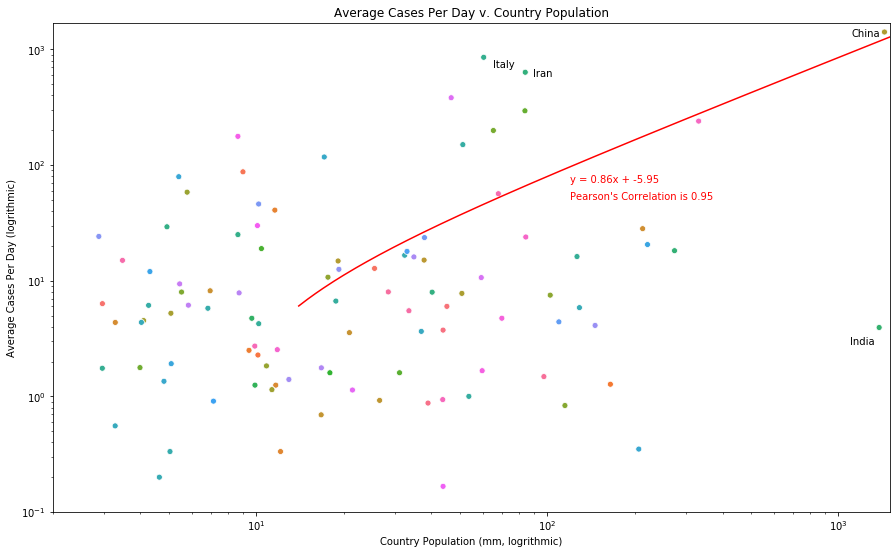

In [27]:
# Scatter Plot x = Average Confirmed cased per day, y = Population

x_values = scatterPlt_df['normalize'].sort_values()
y_values = scatterPlt_df['average'].sort_values()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
x_regression = np.arange(14,1500.0,0.5)
regress_values = x_regression * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1,ax=plt.subplots(figsize=(15,9))
plt.xlim(.2e1,1.5e3)
plt.xscale("log")
plt.ylim(1e-1,1.7e3)
plt.yscale("log")

sns.scatterplot(scatterPlt_df['normalize'],scatterPlt_df['average'], hue =scatterPlt_df['country'])
ax.get_legend().remove()
plt.plot(x_regression,regress_values,"r-")

plt.annotate(f"Pearson's Correlation is {rvalue:.2f}", (120,50), color="red")
plt.annotate(line_eq,(120,70),color="red") #120 is the position of line_eq (smaller number is close to Y-axis )
                                           #70 is the position of line_eq (smaller number is close to x-axis )
plt.annotate("India",(1100,2.8))
plt.annotate("China",(1110,1300))
plt.annotate("Iran",(89,580))
plt.annotate("Italy",(65,700))

#43    Iran   598.777778           8.399295e+07    83.992949
#47   Italy   684.869565           6.046183e+07    60.461826


plt.title("Average Cases Per Day v. Country Population")
plt.ylabel("Average Cases Per Day (logrithmic)")
plt.xlabel("Country Population (mm, logrithmic)")

plt.savefig("./Linear_AvgCase_CountryPopulation.png")
# The "_ = " catches the return value of the last command, so it doesn't distract from the figure

# 22           China  1414.175439           1.439324e+09  1439.323776
# 36         Germany   294.596154           8.378394e+07    83.783942
# 45            Iran   634.655172           8.399295e+07    83.992949
# 49           Italy   854.854167           6.046183e+07    60.461826
# 91           Spain   382.170213           4.675478e+07    46.754778
# 100  United States   239.929825           3.310027e+08   331.002651

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(slope)

0.856592563264078


Scatter plot with only interested country

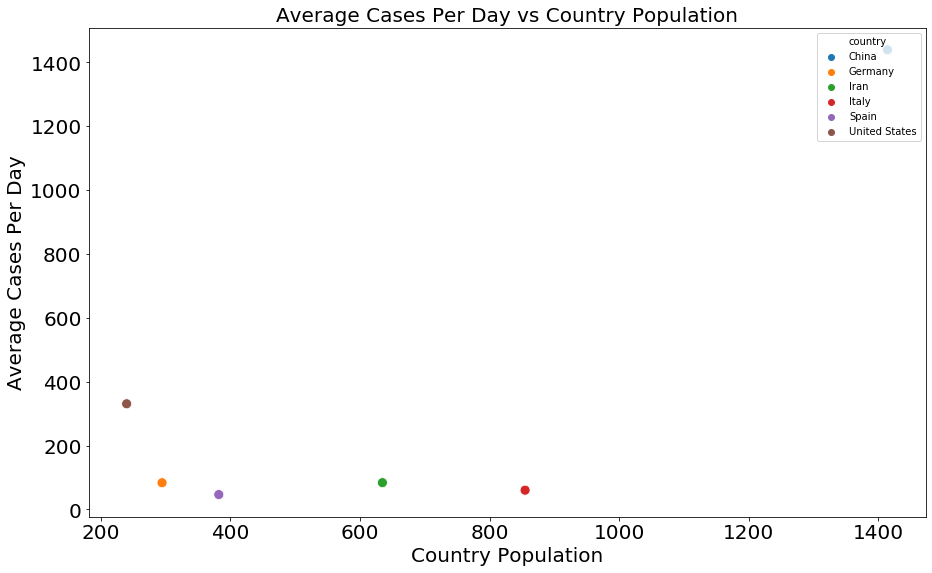

In [37]:
country_interest = ['China','Italy','Germany','Iran','Spain','United States']

fig2 = plt.figure(2, figsize=(15,9))
country_interest_df = scatterPlt_df.loc[scatterPlt_df['country'].isin(country_interest)]
sns.scatterplot(country_interest_df['average'],country_interest_df['normalize'],hue = country_interest_df['country'],
               s = 100)
plt.legend(loc = 1)
plt.title("Average Cases Per Day vs Country Population",fontsize = 20)
plt.ylabel("Average Cases Per Day", fontsize = 20)
plt.xlabel("Country Population", fontsize = 20)
plt.tick_params(axis ='x', which = 'major', labelsize =20)
plt.tick_params(axis ='y', which = 'major', labelsize =20)

plt.savefig("./Scatter_Avg_CountryPopulation.png")

Box Plots to see the spead out of the average daily confirmed case 

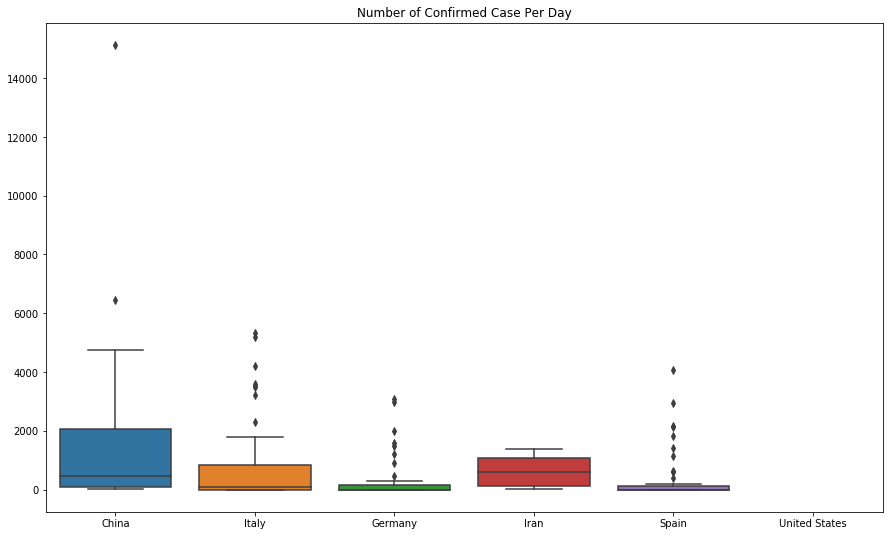

In [30]:
diff_confirm_df = diff_confirm_df.reindex(country_interest, axis =1)

fig3 = plt.figure(3, figsize=(15,9))
sns.boxplot(data = diff_confirm_df)
plt.title("Number of Confirmed Case Per Day")
plt.savefig("./Box_NoConfirmCase.png")